In [1]:
#Importing required pandas,matplotlib and seaborn packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing CSV file to df
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#checking the dataframe if they are any null values 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#gender has other category
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
##So,replacing gender with the highest female count 
df["gender"] = df["gender"].replace(['Other'],'Female')

In [8]:
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [9]:
#bmi has 201 null values
#replacing null values with the mean of bmi 
df['bmi'].fillna(int(df['bmi'].mean()), inplace=True)

In [10]:
#checking for null values in bmi after replacing it
df['bmi'].isna().sum()

0

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Age')]

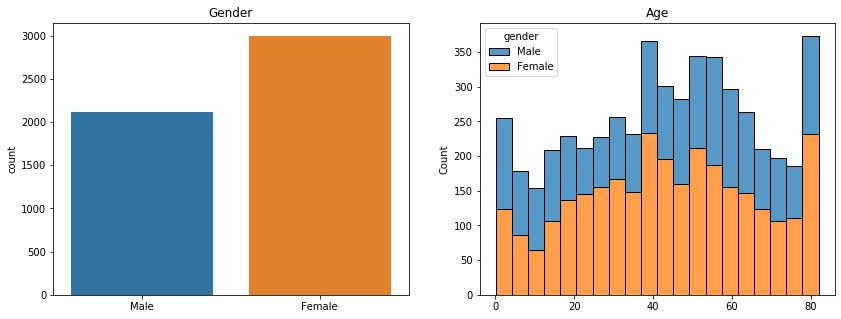

In [11]:
#count plot of gender count and age count of female and male 
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='gender', data=df, ax=ax[0])
ax[0].set(xlabel=None, title='Gender')
sns.histplot(data=df, x="age", hue="gender", multiple ='stack', ax=ax[1])
ax[1].set(xlabel=None, title='Age')

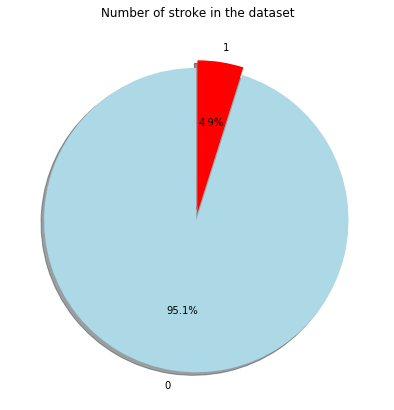

In [12]:
#piechart for stroke 
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
colors = ["lightblue","red"]
explode = (0.05,0) 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Number of stroke in the dataset')
plt.show()

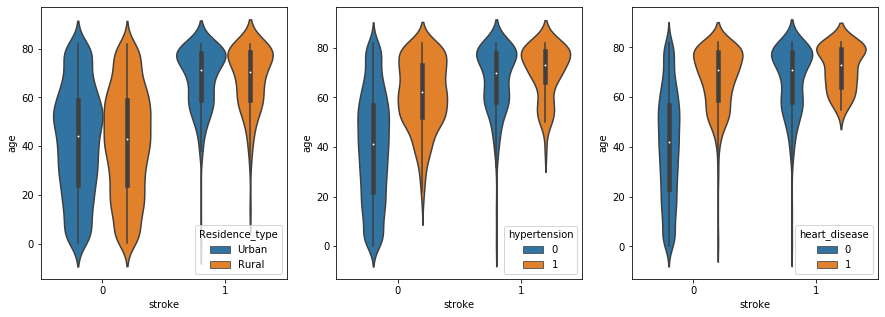

In [13]:
#plot showing distributing of stroke,age with residence type ,hyper tensiona dn hear disease
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(ax=axes[0], x="stroke", y="age", data=df ,hue='Residence_type')
sns.violinplot(ax=axes[1], x="stroke", y="age", data=df ,hue='hypertension')
sns.violinplot(ax=axes[2], x="stroke", y="age", data=df ,hue='heart_disease')

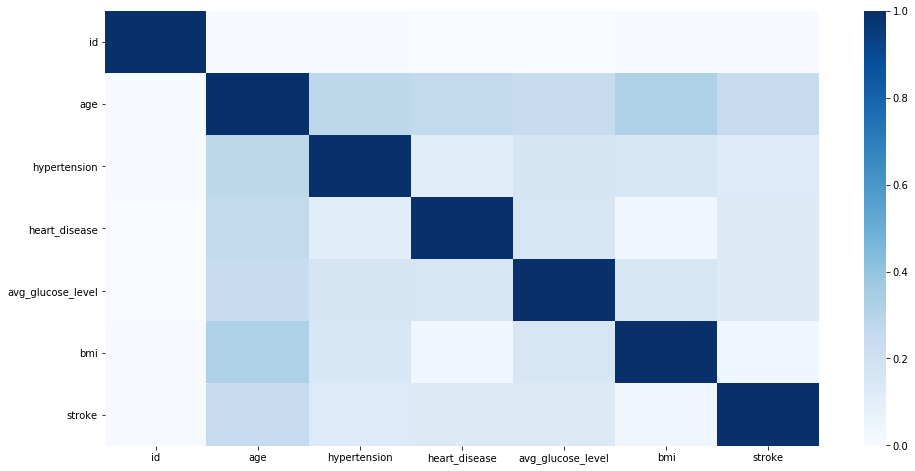

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="Blues");

Heat Map of stroke dataframe 

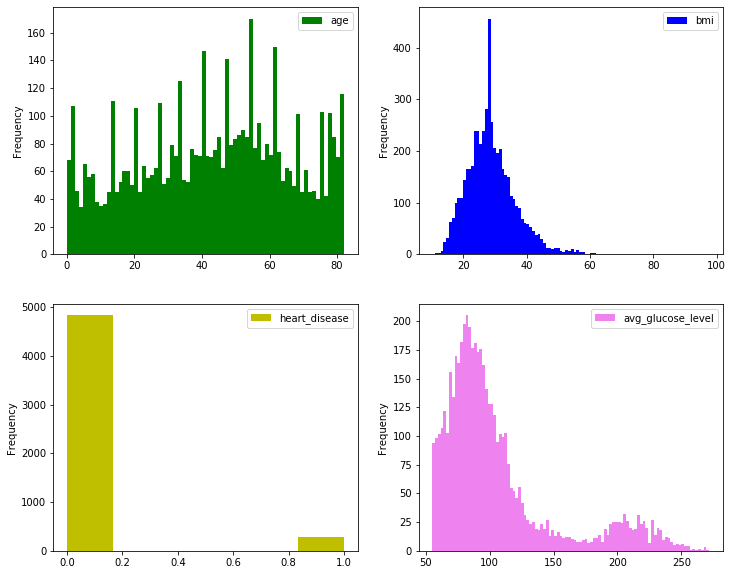

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="g", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="b", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="y", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="violet", ax=axes[1][1])
plt.show()

In [16]:
#Extracting the dataframe who is having stroke from dataframe 
df1=df[df['stroke']==1]
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.0,Unknown,1


In [17]:
#Now,taking out low_bmi from df1
low_bmi = df1.loc[df1['bmi']<18.5]
low_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
230,10552,Female,81.0,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1


In [18]:
#Now,taking out high_bmi from df1
high_bmi = df1.loc[df1['bmi']>25]
high_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [19]:
#Counting number of females from high_bmi 
high_bmi_gender=high_bmi.loc[high_bmi['gender']=='Male']
high_bmi_gender.count()

id                   98
gender               98
age                  98
hypertension         98
heart_disease        98
ever_married         98
work_type            98
Residence_type       98
avg_glucose_level    98
bmi                  98
smoking_status       98
stroke               98
dtype: int64

In [20]:
#Counting number of males from high_bmi 
high_bmi_gender=high_bmi.loc[high_bmi['gender']=='Female']
high_bmi_gender.count()

id                   113
gender               113
age                  113
hypertension         113
heart_disease        113
ever_married         113
work_type            113
Residence_type       113
avg_glucose_level    113
bmi                  113
smoking_status       113
stroke               113
dtype: int64

In [21]:
#Count of low_bmi 
a=low_bmi.count()
a

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [22]:
#Count of high_bmi
b=high_bmi.count()
b

id                   211
gender               211
age                  211
hypertension         211
heart_disease        211
ever_married         211
work_type            211
Residence_type       211
avg_glucose_level    211
bmi                  211
smoking_status       211
stroke               211
dtype: int64

Text(0.5, 1.0, 'Low risk BMI count')

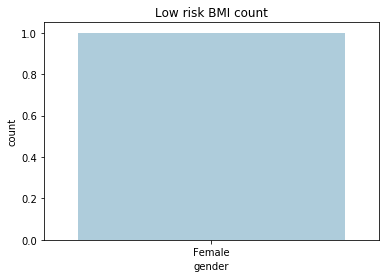

In [23]:
#countplot for low bmi 
sns.countplot(data=low_bmi,x='gender', palette="Paired")
plt.title('Low risk BMI count')

Text(0.5, 1.0, 'High risk BMI count')

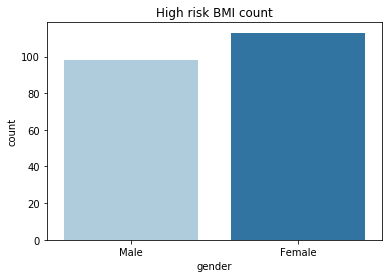

In [24]:
#countplot for low bmi 
sns.countplot(data=high_bmi,x='gender', palette="Paired")
plt.title('High risk BMI count')

In [25]:
#caluclating low_bmi count on over all 
low_bmi=df.loc[df['bmi']<18.5]
low_bmi_count=low_bmi.count()
low_bmi_count

id                   337
gender               337
age                  337
hypertension         337
heart_disease        337
ever_married         337
work_type            337
Residence_type       337
avg_glucose_level    337
bmi                  337
smoking_status       337
stroke               337
dtype: int64

In [26]:
#caluclating high_bmi count on over all 
high_bmi=df.loc[df['bmi']>25]
high_bmi_count=high_bmi.count()
high_bmi_count

id                   3503
gender               3503
age                  3503
hypertension         3503
heart_disease        3503
ever_married         3503
work_type            3503
Residence_type       3503
avg_glucose_level    3503
bmi                  3503
smoking_status       3503
stroke               3503
dtype: int64

In [27]:
#calucating percentage for risk of  low_bmi_count 
a/low_bmi_count

id                   0.002967
gender               0.002967
age                  0.002967
hypertension         0.002967
heart_disease        0.002967
ever_married         0.002967
work_type            0.002967
Residence_type       0.002967
avg_glucose_level    0.002967
bmi                  0.002967
smoking_status       0.002967
stroke               0.002967
dtype: float64

In [28]:
#caluclating percentage for risk of high_bmi_count
b/high_bmi_count

id                   0.060234
gender               0.060234
age                  0.060234
hypertension         0.060234
heart_disease        0.060234
ever_married         0.060234
work_type            0.060234
Residence_type       0.060234
avg_glucose_level    0.060234
bmi                  0.060234
smoking_status       0.060234
stroke               0.060234
dtype: float64

Text(0.5, 1.0, 'number of female and male who suffered from HYPER TENSION ')

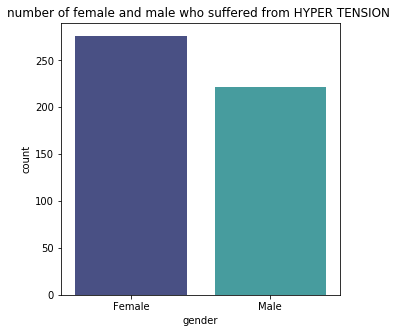

In [29]:
#To determine which gender is suffering more from hypertension 
plt.figure(figsize=(5,5))
stroke = df.loc[df['hypertension']==1]
sns.countplot(data=stroke,x='gender',palette='mako')
plt.title("number of female and male who suffered from HYPER TENSION ")

Text(0.5, 1.0, 'number of female and male who suffered from STROKE ')

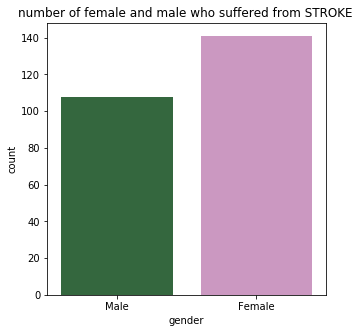

In [30]:
#count of gender suffering from stroke 
plt.figure(figsize=(5,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='gender', palette="cubehelix")
plt.title("number of female and male who suffered from STROKE ")

Text(0.5, 1.0, 'number of female and male who suffered from HEART DISEASE ')

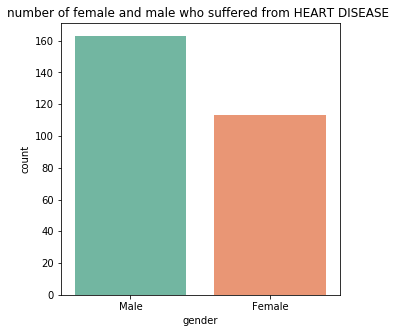

In [31]:
#To determine which gender is suffering more from heart_disease 
plt.figure(figsize=(5,5))
stroke = df.loc[df['heart_disease']==1]
sns.countplot(data=stroke,x='gender', palette="Set2")
plt.title("number of female and male who suffered from HEART DISEASE ")

In [32]:
#extracting the rows having the avg_glucose_levelgreater than 200 
avg_glucose_level = df.loc[df['avg_glucose_level']>200]
avg_glucose_level.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.0,Unknown,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1


In [33]:
#From the people suffering from glucose,extracting the rows who are suffering from the stroke 
avg_glucose_level=avg_glucose_level[avg_glucose_level['stroke']==1]
avg_glucose_level.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.0,Unknown,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1


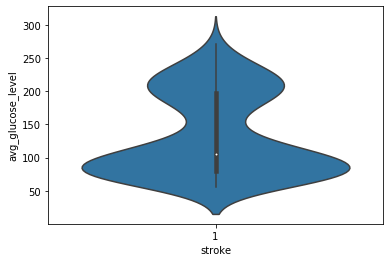

In [34]:
#heart stroke and heart stroke from glucose
a=df[df['stroke']==1]
ax = sns.violinplot(x="stroke", y="avg_glucose_level", data=a)
plt.show()

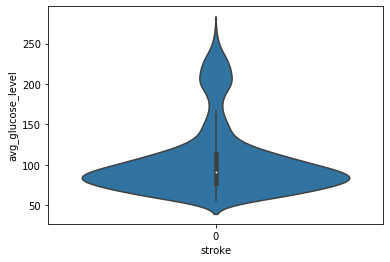

In [35]:
b=df[df['stroke']==0]
ax = sns.violinplot(x="stroke", y="avg_glucose_level", data=b)